# Algorithme de Metropolis

Soit $E$ un ensemble dénombrable et $\mu$ une probabilité sur $E$. L'algorithme de Metropolis permet de construire une chaîne de Markov de probabilité invariante $\mu$. 

Soit $P$ une matrice stochastique, dite de sélection (ou de proposition), qui permet de parcourir l'espace d'état $E$ et $\rho$ la fonction définie par 
$$
    \forall x, y \in E, \quad \rho(x, y) = \frac{\mu(y) P(y, x)}{\mu(x) P(x, y)} \wedge 1.
$$
On considère la matrice stochastique 
$$
    Q(x, y) = \begin{cases} 
        P(x, y) \rho(x, y) & \text{si $x \neq y$} \\
        1 - \sum_{z \neq x} Q(x, z) & \text{si $x = y$}.
    \end{cases}
$$

Alors sous les hypothèses adhoc, la chaine de Markov $(Y_n)_{n \ge 1}$ de transition $Q$ a pour unique probabilité invariante $\mu$ et $(Y_n)_{n \ge 1}$ converge en loi vers $\mu$.

## Petit exemple sur $\mathbf{Z}$

On considère la probabilité $\mu$ sur $E = \mathbf{Z}$ définie par 
$$
    \forall x \in \mathbf{Z}, \quad \mu(x) = C \exp \bigl(- \frac{|x|}{5}\bigr).
$$
Soit $P$ la matrice de transition de la marche aléatoire symétrique sur $\mathbf{Z}$ définie par $P(x, x-1) = P(x, x+1) = \frac{1}{2}$.
Implémenter l'algorithme de Metropolis pour simuler une trajectoire de la chaine $(Y_n)_{n \ge 1}$ de loi invariante $\mu$. Vous pourrez reproduire les graphes suivants pour vérifier la validité de votre code.
![image](traj_metro.png)
![image](hist_metro.png)

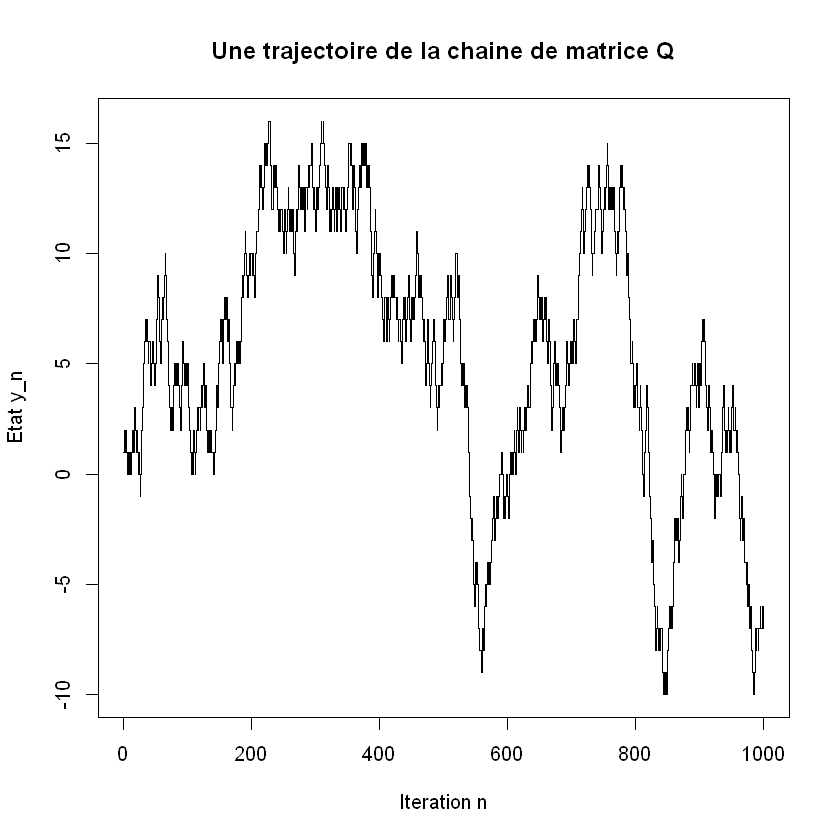

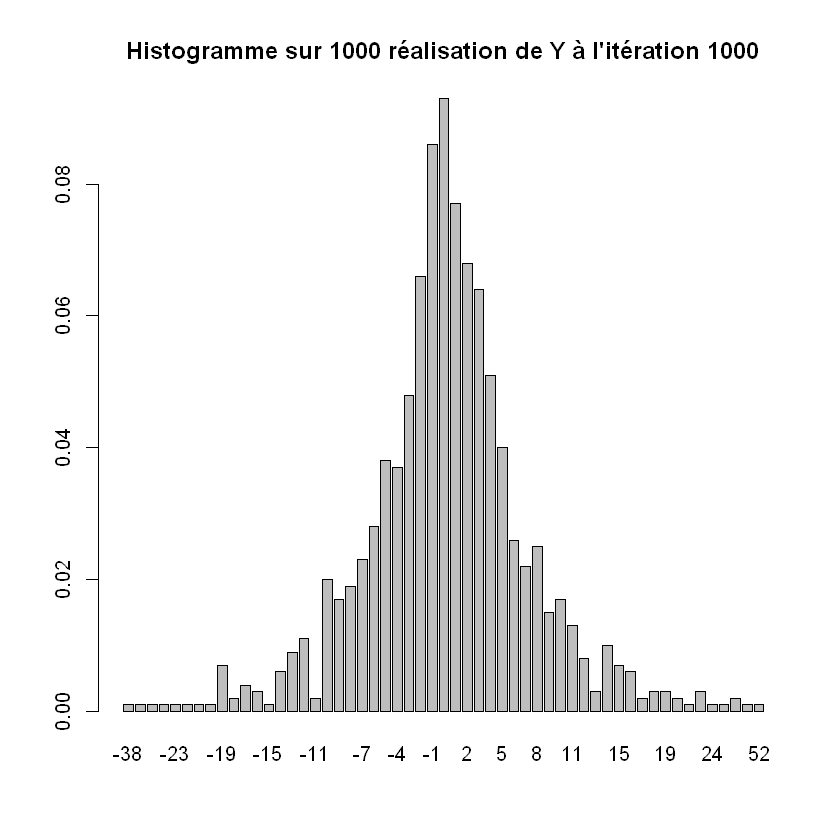

In [1]:
mu <- function(x) {
    return(exp(-abs(x)/5))
}

# la fonction suivante code la simulation de Y_{n+1} à partir de Y_n = y
phi <- function(y) {
    prop <- y
    if (runif(1) < 0.5) { prop <- y-1 }
    else { prop <- y+1 }
    v <- runif(1)
    if (v < min(mu(prop) / mu(y), 1)) { return(prop) }
    else { return(y) }
}

# une trajectoire jusqu'à l'itération n
traj <- function(n) {
    result <- numeric(n)
    y <- 0
    for (i in 1:n) {
        y <- phi(y)
        result[i] <- y
    }
    return(result)
}

n <- 1000
plot(traj(n), type = "s", ylab = "Etat y_n", xlab = "Iteration n", main="Une trajectoire de la chaine de matrice Q")
Nsim <- 1000
x <- replicate(Nsim, traj(n))
barplot(table(x[n,]) / ncol(x), main=paste("Histogramme sur", Nsim, "réalisation de Y à l'itération", n))

# Algorithme du recuit simulé

Soit $E$ fini et $H:E \to \mathbf{R}$ une fonction dont on cherche un minimum. On considère une mesure de Gibbs paramétrée par $T > 0$ de la forme
$$
    \mu_T(x) = \frac{1}{Z_T} \exp \bigl(- \frac{H(x)}{T} \bigr),
$$
où $Z_T$ est la constante de normalisation souvent appelée fonction de partition. Lorsque $T$ tend vers $0$ la mesure $\mu_T$ se concentre sur l'ensemble des minimums de $H$, on considère donc une suite déterministe $(T_n)_{n \ge 1}$ qui tend vers 0 et l'algorithme de Metropolis (inhomogène) suivant: 

$$
    Q_n(x, y) = \begin{cases} 
        P(x, y) \exp \Bigl( - \frac{(H(y) - H(x))_+}{T_n} \Bigr) & \text{si $x \neq y$} \\
        1 - \sum_{z \neq x} Q_n(x, z) & \text{si $x = y$}.
    \end{cases}
$$

où $P$ est une matrice stochastique _irréductible symétrique_.

## Problème du voyageur de commerce

L'énoncé du problème du voyageur de commerce est le suivant : étant donné $N$ points (des « villes ») et les distances séparant chaque point, trouver un chemin de longueur totale minimale qui passe exactement une fois par chaque point et revienne au point de départ. La distance considérée ici est la distance euclidienne. 

Soit $N$ villes fixées représentées par un vecteur $V = (V_1, \dots, V_N) \in ([0,1]^2)^N$. Une composante de ce vecteur $V$ est la coordonnée d'une ville dans $[0,1]^2$ et la distance euclidienne $d$ entre 2 villes $V_i$ et $V_j$ est notée dans la suite $d(V_i, V_j)$. Un trajet est identifié par une permutation de $\{1,\dots,N\}$.

Ainsi $E = \mathcal{S}_N$ l'ensemble des permutations de $\{1,\dots,N\}$ et $H$ que l'on appelle ici la longueur d'un trajet $x \in E$ est définie par 
$$
    \forall x \in E, \quad H(x) = \sum_{i=1}^{N-1} d \bigl(V_{x_i}, V_{x_{i+1}} \bigr) + d \bigl(V_{x_N}, V_{x_{1}} \bigr)
$$
Pour information il y a ${\rm Card}(H(E)) = \frac{N !}{2 N}$ longueurs de trajets possibles. 

## Préparatifs

* Récupérer la liste des coordonnées des villes du fichier "villes.txt" en utilisant la fonction `read.table` et afficher le nombre de longueurs de trajets possibles.

* Coder une fonction `distance(i, j)` qui calcule la distance euclidienne entre les 2 villes $V_i$ et $V_j$.

* Coder la fonction `H(x)` pour un vecteur `x` qui représente un trajet.

* Coder une fonction `affiche(x)` qui affiche les villes et un trajet `x`. Voici l'affichage du trajet initial et d'un trajet optimal trouvé par l'algorithme. La première ville $V_1$ est indiquée en rouge et la longueur du chemin est affichée en utilisant 5 chiffres avec la commande 
```R 
format(H(x), digits = 5)
```
![image](villes.png)

In [2]:
villes <- read.table("villes.txt")
N <- nrow(villes)
factorial(N) / (2*N)

[1] 4.420881e+30

In [3]:
distance <- function(i, j) {
    return(sqrt((villes[i,1]-villes[j,1])^2 + (villes[i,2]-villes[j,2])^2))
}

H <- function(x) {
    sum <- distance(x[N], x[1])
    for (i in 1:(N-1)) {
        sum <- sum + distance(x[i], x[i+1])
    }
    return(sum)
}

affiche <- function(x) {
    longueur <- format(H(x), digits = 5)
    plot(villes[,1], villes[,2], col = "blue", xlab = NA, ylab = NA, main = paste("Chemin de longueur", longueur))
    points(villes[1,1], villes[1,2], col = "red")
    u <- c(villes[x, 1], villes[x[1], 1])
    v <- c(villes[x, 2], villes[x[1], 2])
    lines(u, v, col = "grey")
}

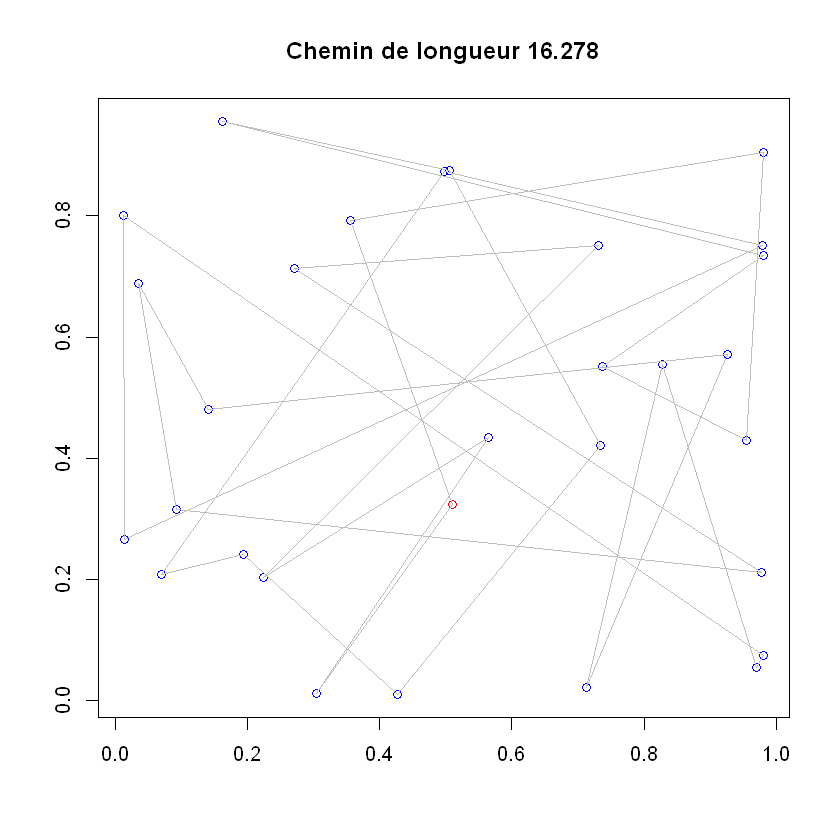

In [4]:
affiche(1:N)

## Recuit simulé

Pour mettre en oeuvre l'algorithme de recuit simulé il faut choisir une matrice de sélection $P$ pour parcourir l'espace et une suite $(T_n)_{n \ge 1}$ qui tend vers 0. Dans un premier temps on définit la fonction de température $T$ de la façon suivante:
```R
T <- function(n) { return(0.01 / log(n)) }
```

### Première matrice de transition
La première matrice de transition que l'on considère est la plus intuitive. Etant donné un trajet $x$ on tire 2 indices $i$ et $j$ de $\{1,\dots,N\}$ et on échange ces indices c'est à dire qu'on propose le trajet voisin $y$ définit si $i < j$ (par exemple) par  
$$
    y = (x_1, \dots, x_{i-1}, x_{j}, x_{i+1}, \dots, x_{j-1}, x_{i}, x_{j+1}, \dots, x_N)
$$
Coder une fonction `P1` qui prend un trajet `x` et qui renvoie un trajet voisin `y`.

Coder une fonction `Q(P, T, x, n)` qui prend 4 arguments: `P` la matrice de sélection, `T` la fonction de température, `x` le trajet courant et `n` l'itération courante et qui renvoie le trajet à l'itération `n+1`.


In [5]:
P1 <- function(path) {
    ec <- sample(1:N, 2, replace = TRUE)
    path[ec] <- path[rev(ec)]
    return(path)
}

Q <- function(P, T, x, n) {
    y <- P(x)
    delta <- H(y) - H(x)
    if (delta < 0) { return(y) } 
    if (runif(1) < exp(-delta / T(n))) { return(y) } 
    else { return(x) }
}

Coder l'algorithme de Métropolis en faisant $N_0 = 1000$ appels successifs de la fonction `Q` et en sauvant les longueurs des différents trajets retenus dans un vecteur de taille $N_0$. Vous devez reproduire un affichage semblable à celui-ci. On arrête l'algorithme à $N_0 = 1000$ pour que le calcul ne prenne pas trop de temps mais il faudrait continuer un peu. Le langage `R` est lent à l'execution et pour un tel problème il est recommandé d'utiliser un langage compilé comme le `C++` (ici on illustre seulement l'algorithme).
![image](chemin_P1.png)

[1] 26  2 22  4 21 10 25 16  9 30  6 28 11  7 15 14 12  8 17 20  1  3 23 13 27
[26] 19 24  5 29 18

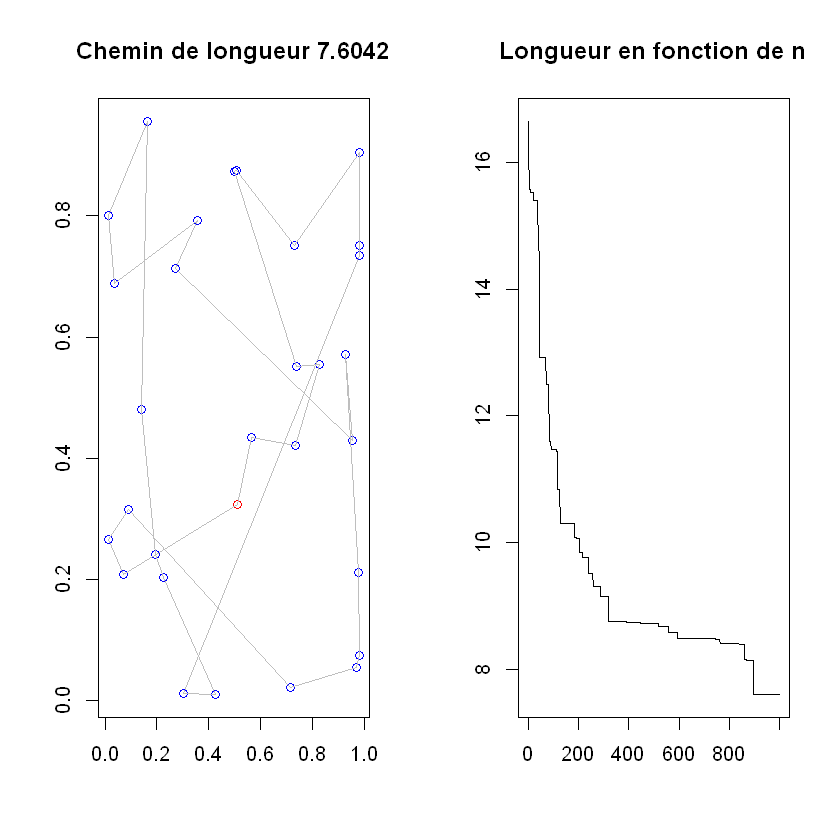

In [6]:
T <- function(n) { return(0.01 / log(n)) }
x <- 1:N
N0 <- 1000
longueurs <- numeric(N0)
for (n in 1:N0) {
    x <- Q(P1, T, x, n)
    longueurs[n] <- H(x)
}
x
#png("chemin_P1.png", width = 800)
par(mfrow = c(1,2))
affiche(x)
plot(longueurs, type = "l", ylab=NA, xlab=NA, main="Longueur en fonction de n")

### Variantes sur la matrice de sélection

* La première variante consiste à supprimer le cas où l'on propose en $n+1$ un trajet similaire à celui en $n$. C'est le cas avec la matrice $P_1$ car $P_1(x, x) = \frac{1}{N} > 0$. Pour cela il suffit de tirer 2 indices $i$ et $j$ de $\{1,\dots,N\}$ sans remise, et on aura donc $i \neq j$. 

Coder une fonction `P2` similaire à `P1` qui correspond à cette matrice de sélection.

* La seconde variante consiste à partir de 2 indices $i$ et $j$ différents de couper le trajet en ces indices et de retourner le trajet entre ces 2 indices. Ainsi le trajet voisin proposé $y$ à partir de $x$ est défini par 
$$
    y = (x_1, \dots, x_{i-1}, x_{j}, x_{j-11}, \dots, x_{i+1}, x_{i}, x_{j+1}, \dots, x_N)
$$

Coder une fonction `P3` qui correspond à cette matrice de sélection.


In [7]:
P2 <- function(path) {
    ec <- sample(1:N, 2, replace = FALSE)
    path[ec] <- path[rev(ec)]
    return(path)
}

P3 <- function(path) {
    ec <- sample(1:N, 2, replace = FALSE)
    indices <- min(ec):max(ec)
    path[indices] <- path[rev(indices)]
    return(path)
}

Tester ces matrices de sélection avec plusieurs réalisations de l'algorithme de Metropolis.

Le meilleur trajet trouvé avec la matrice de sélection $P_3$ et $N_0 = 5000$ itérations est le trajet stocké dans le fichier "best.txt". Vous pouvez l'afficher en tapant 
```R
x <- read.table("best.txt")
affiche(x$V2)
```

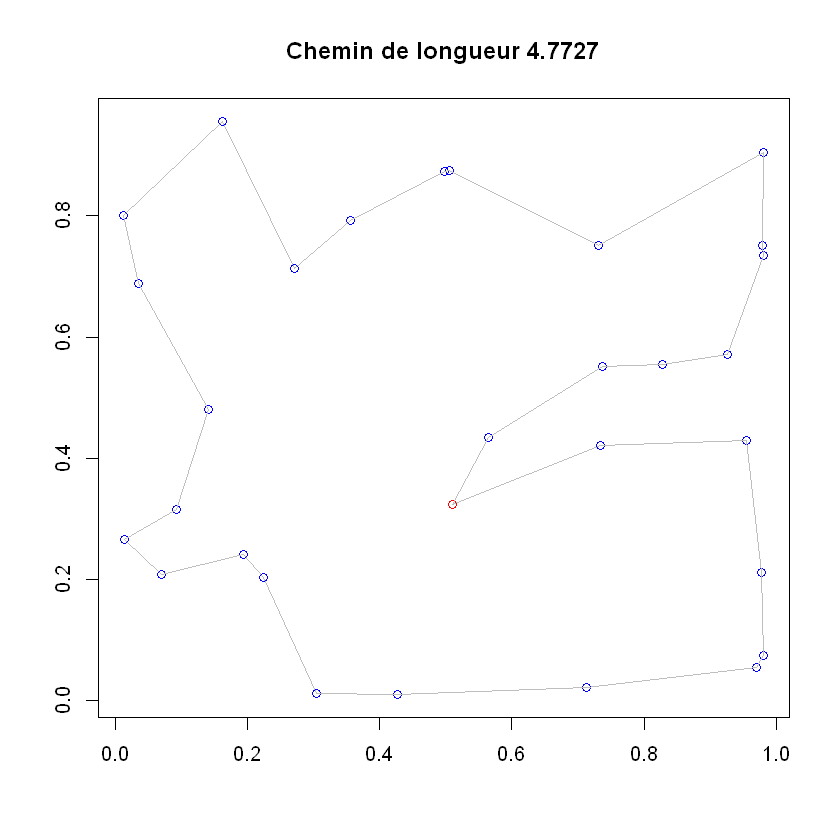

In [8]:
x <- read.table("best.txt")
affiche(x$V2)